<a href="https://colab.research.google.com/github/nerissavu/CHEG472_Week2Workshop/blob/main/Week2_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
import pandas as pd
from google.colab import files

#Upload the file
uploaded = files.upload()

#Load the dataset
file_name = "/content/Dataset Clean.xlsx"
df = pd.read_excel(file_name)

#Display the first few rows of the dataset
df.head()

#Check for missing data
missing_data = df.isnull().sum()

#Display columns with missing data
missing_data[missing_data > 0]



Saving Dataset Clean.xlsx to Dataset Clean (2).xlsx


,0
Number,50
Biomass,1
PS,1
PV,1
C,3
H,4
N,6
O,3


In [ ]:
df_cleaned = df.dropna()

In [ ]:
#Step 3:
#Print the dataset's column
print(df.columns)

#Check the data types to identify numeric columns
df.dtypes

Index(['Number', 'Biomass', 'TP', 'TemP', 'Time (min)', 'PS', 'BET', 'PV', 'C',
       'H', 'N', 'O', 'Qm (mg/g)'],
      dtype='object')


,0
Number,float64
Biomass,object
TP,object
TemP,int64
Time (min),float64
PS,float64
BET,float64
PV,float64
C,float64
H,float64


In [ ]:
#Print the dataset's columns
print(df.columns)

#Check the data types to identify numeric columns
df.dtypes

Index(['Number', 'Biomass', 'TP', 'TemP', 'Time (min)', 'PS', 'BET', 'PV', 'C',
       'H', 'N', 'O', 'Qm (mg/g)'],
      dtype='object')


,0
Number,float64
Biomass,object
TP,object
TemP,int64
Time (min),float64
PS,float64
BET,float64
PV,float64
C,float64
H,float64


In [ ]:
#Replace 'your_column' with the actual column name that needs conversion
df['Qm (mg/g)'] = df['Qm (mg/g)'].str.replace(',','.').astype(float)

In [ ]:
#Remove the first column of the dataset
df = df.iloc[:,1:]

#Display the first few rows to confirm the column is removed
df.head()

,Biomass,TP,TemP,Time (min),PS,BET,PV,C,H,N,O,Qm (mg/g)
0,Waste sludge (paper),Citalopram,315,150.0,9.82,3.43,0.02,30.84,2.14,NaN,20.32,4.4
1,Waste sludge (paper),Citalopram,600,10.0,1.37,94.39,0.06,30.69,0.96,NaN,20.41,3.8
2,Waste sludge (paper),Citalopram,800,10.0,1.37,120.86,0.08,28.81,0.47,NaN,19.29,8.5
3,Waste sludge (Biological),Citalopram,800,150.0,1.41,209.12,0.13,27.05,0.82,NaN,9.73,19.6
4,Waste sludge (Biological),Citalopram,800,10.0,3.69,10.82,0.02,35.35,0.72,NaN,2.01,4.3


In [ ]:
#Print the dataset's columns
print(df.columns)

#Check the data types to identify numeric columns
df.dtypes

Index(['Biomass', 'TP', 'TemP', 'Time (min)', 'PS', 'BET', 'PV', 'C', 'H', 'N',
       'O', 'Qm (mg/g)'],
      dtype='object')


,0
Biomass,object
TP,object
TemP,int64
Time (min),float64
PS,float64
BET,float64
PV,float64
C,float64
H,float64
N,float64


In [ ]:
#Step 4
#Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

#Display categorical columns
categorical_columns

Index(['Biomass', 'TP'], dtype='object')

In [ ]:
#Step 5
#Apply one_hot encoding to categorical variables
df_encoded = pd.get_dummies(df,columns = categorical_columns, drop_first = True)

#Display the first few rows of the encoded dataset
df_encoded.head()

,TemP,Time (min),PS,BET,PV,C,H,N,O,Qm (mg/g),...,TP_Norfloxacin,TP_Oxytetracycline,TP_Oxytetracycline,TP_Salicylic acid,TP_Sulfadiazine,TP_Sulfamethoxazole,TP_Tetracycline,TP_Triclosan,TP_ibuprofen,TP_sulfamethazine
0,315,150.0,9.82,3.43,0.02,30.84,2.14,NaN,20.32,NaN,...,False,False,False,False,False,False,False,False,False,False
1,600,10.0,1.37,94.39,0.06,30.69,0.96,NaN,20.41,NaN,...,False,False,False,False,False,False,False,False,False,False
2,800,10.0,1.37,120.86,0.08,28.81,0.47,NaN,19.29,NaN,...,False,False,False,False,False,False,False,False,False,False
3,800,150.0,1.41,209.12,0.13,27.05,0.82,NaN,9.73,NaN,...,False,False,False,False,False,False,False,False,False,False
4,800,10.0,3.69,10.82,0.02,35.35,0.72,NaN,2.01,NaN,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Step 6
X = df_encoded.drop('BET',axis=1)
y = df_encoded['BET']

#Display
X.head, y.head()

(<bound method NDFrame.head of     TemP  Time (min)      PS       PV      C     H   N      O  Qm (mg/g)  \
 0    315       150.0    9.82  0.02000  30.84  2.14 NaN  20.32        NaN   
 1    600        10.0    1.37  0.06000  30.69  0.96 NaN  20.41        NaN   
 2    800        10.0    1.37  0.08000  28.81  0.47 NaN  19.29        NaN   
 3    800       150.0    1.41  0.13000  27.05  0.82 NaN   9.73        NaN   
 4    800        10.0    3.69  0.02000  35.35  0.72 NaN   2.01        NaN   
 ..   ...         ...     ...      ...    ...   ...  ..    ...        ...   
 81   300        60.0  213.29  0.03125  48.13  1.53 NaN  48.96        NaN   
 82   700        60.0    1.32  0.20500  62.27  0.00 NaN  24.01        NaN   
 83   700        60.0    1.32  0.13200  46.13  0.00 NaN  32.25        NaN   
 84   800       300.0    2.25  0.37800  68.27  1.24 NaN  12.39        NaN   
 85   800       420.0    4.68  0.38000  38.35  1.04 NaN   4.61        NaN   
 
     Biomass_Alfalfa  ...  TP_Norfloxacin  T

In [ ]:
#Step 7
#Display summary statistics
summary_statistics = df.describe()
print(summary_statistics)

             TemP  Time (min)          PS          BET         PV          C  \
count   86.000000   86.000000   85.000000    86.000000  85.000000  83.000000   
mean   566.453488  151.347287   13.908847   191.444442   0.152331  57.293855   
std    170.921148  126.607738   38.958862   298.769825   0.180884  20.399065   
min    300.000000    0.100000    1.320000     0.479000   0.001000   9.460000   
25%    450.000000   60.000000    2.880000     7.100000   0.020000  41.490000   
50%    500.000000  120.000000    4.440000    59.090000   0.100000  60.000000   
75%    700.000000  150.000000    9.850000   295.500000   0.230000  74.195000   
max    950.000000  480.000000  213.290000  1838.860000   1.030000  89.570000   

               H     N          O   Qm (mg/g)  
count  82.000000  1.00  83.000000    2.000000  
mean    1.927890  3.26  16.469048  119.745000  
std     1.648728   NaN  11.025043  167.379246  
min     0.000000  3.26   0.670000    1.390000  
25%     0.834000  3.26  10.100000   60.

In [ ]:
encoded_columns = [col for col in df_encoded.columns if col not in df.columns]

print("One hot encoded columns: ")
print(encoded_columns)

One hot encoded columns: 
['Biomass_Alfalfa', 'Biomass_Biosolids from muncipal waste', 'Biomass_Burcucumber plants', 'Biomass_Califlower Roots ', 'Biomass_Cassava waste', 'Biomass_Chinese herbal medicine residues (Plant)', 'Biomass_Coffee Grounds', 'Biomass_Corn stalk', 'Biomass_Corn straw', 'Biomass_Cow Manure', 'Biomass_Eucalyptus sawdust ', 'Biomass_Eucalypus ', 'Biomass_Fallen leaves ', 'Biomass_Hollow Tree', 'Biomass_Maize straw ', 'Biomass_Parthenium hysterophorus', 'Biomass_Pinewood', 'Biomass_Potato plant stem clay', 'Biomass_Processing waste', 'Biomass_Quince', 'Biomass_Rice Straw', 'Biomass_River sediment', 'Biomass_Sludge (pharmaceutical)', 'Biomass_Spirulina sp. (microalgae)', 'Biomass_Straw biochar', 'Biomass_Swine manure', 'Biomass_Tea leaves', 'Biomass_Thalia dealbata', 'Biomass_Vine', 'Biomass_Walnut tree', 'Biomass_Waste sludge (Biological)', 'Biomass_Waste sludge (paper)', 'Biomass_Wood chip biochar', 'Biomass_bagasse (100 mM FeCl3)', 'Biomass_bagasse (200 mM FeCl3)',

In [ ]:
df_no_encoding = df_encoded.drop(columns=encoded_columns)

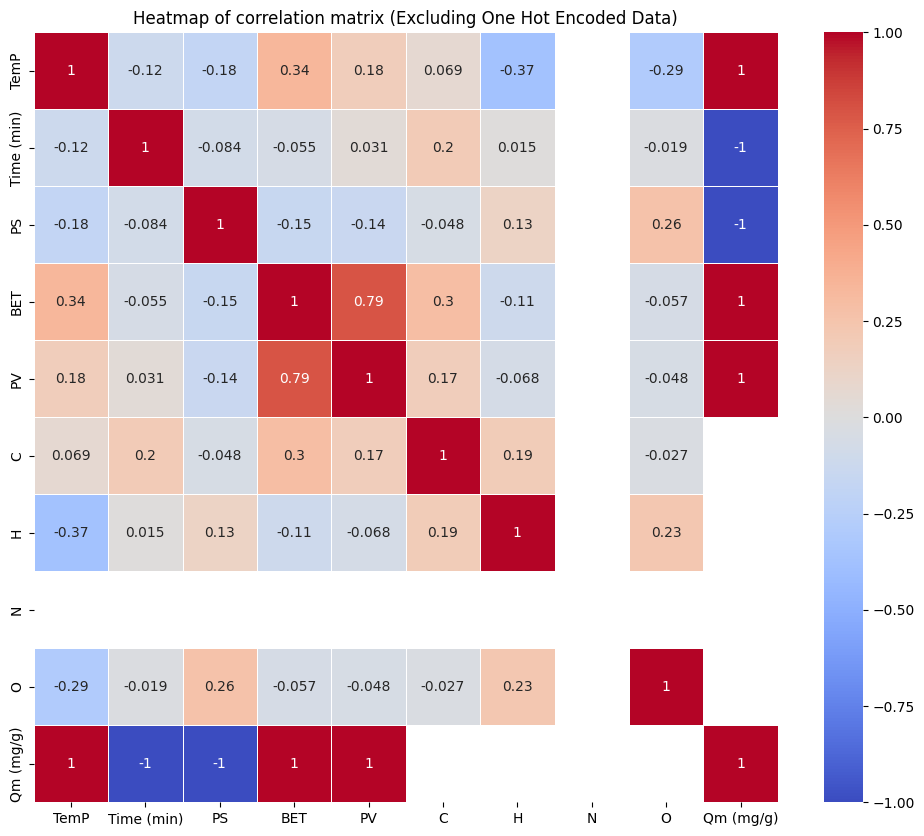

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,10))
sns.heatmap(df_no_encoding.corr(), annot=True, cmap='coolwarm', linewidths = 0.5)
plt.title('Heatmap of correlation matrix (Excluding One Hot Encoded Data)')
plt.show()

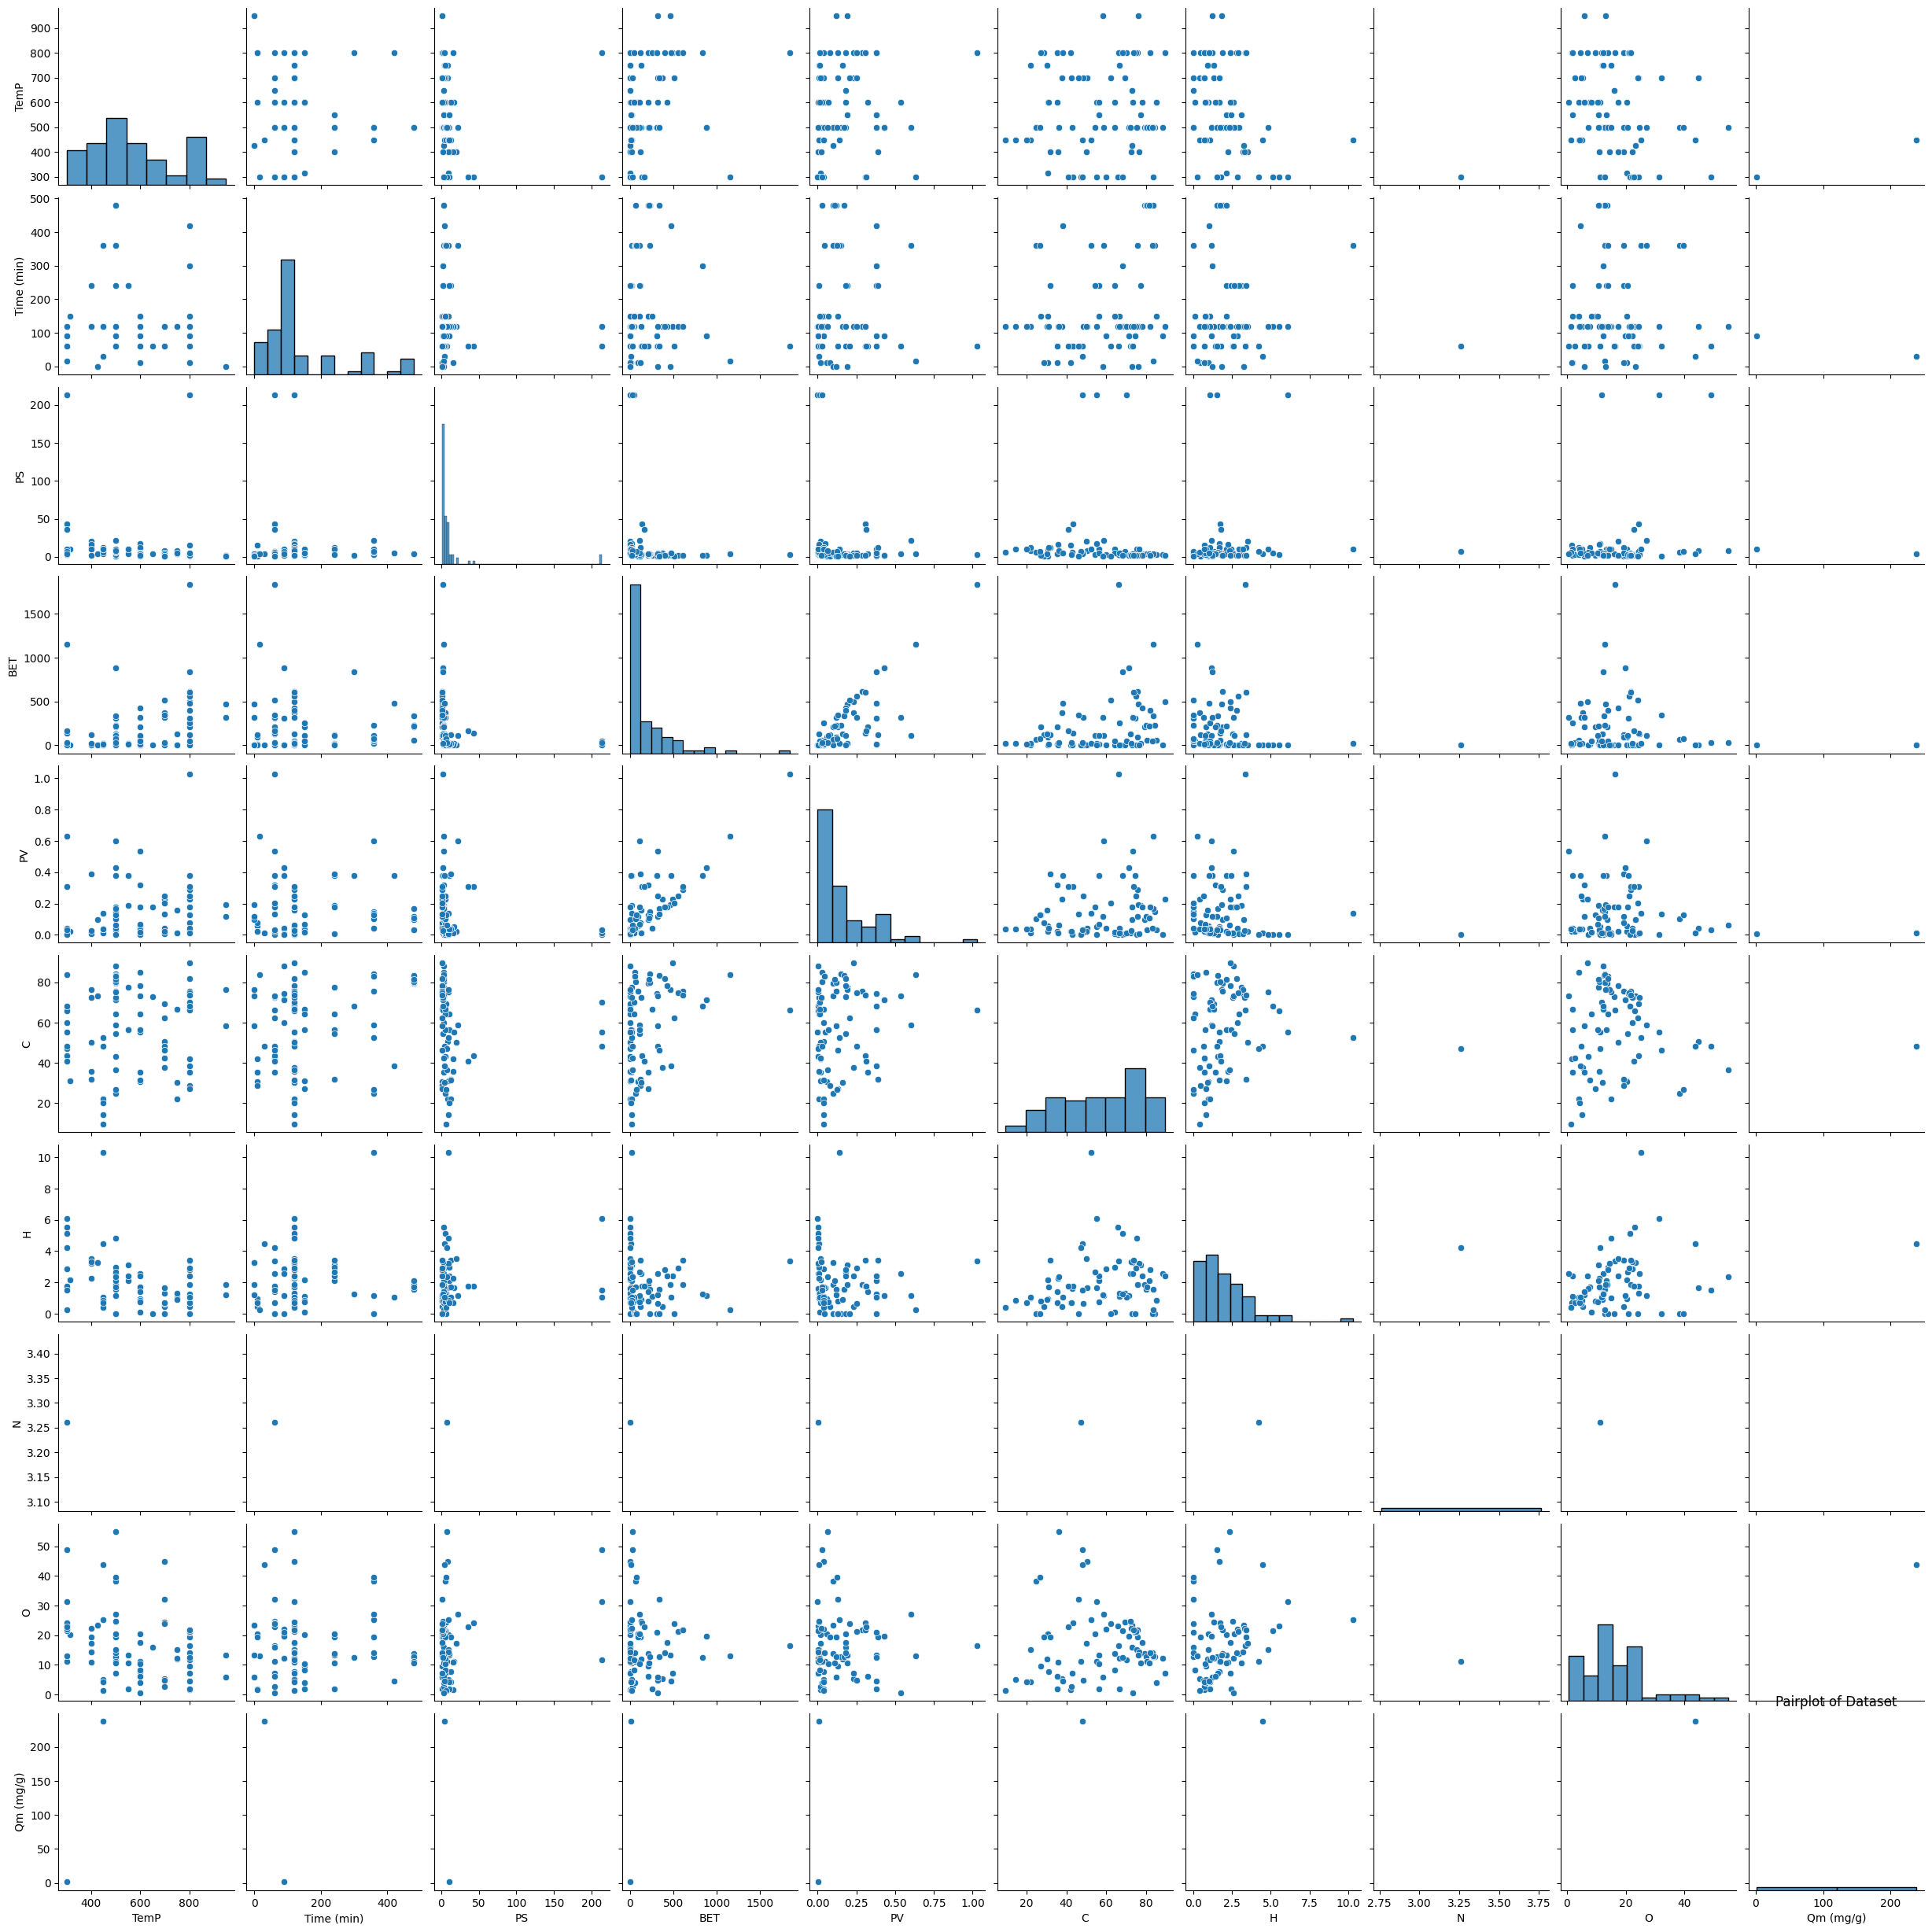

In [ ]:
#Plot a pairplot to visualize relationships between variables
sns.pairplot(df)
plt.title("Pairplot of Dataset")
plt.show()

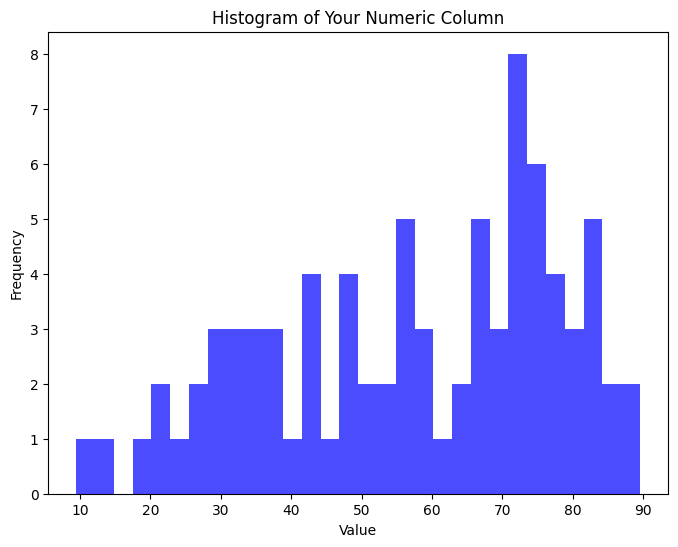

In [ ]:
import matplotlib.pyplot as plt

#Plotting a histogram
plt.figure(figsize=(8,6))
plt.hist(df['C'], bins = 30, alpha = 0.7, color = 'blue')
plt.title('Histogram of Your Numeric Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

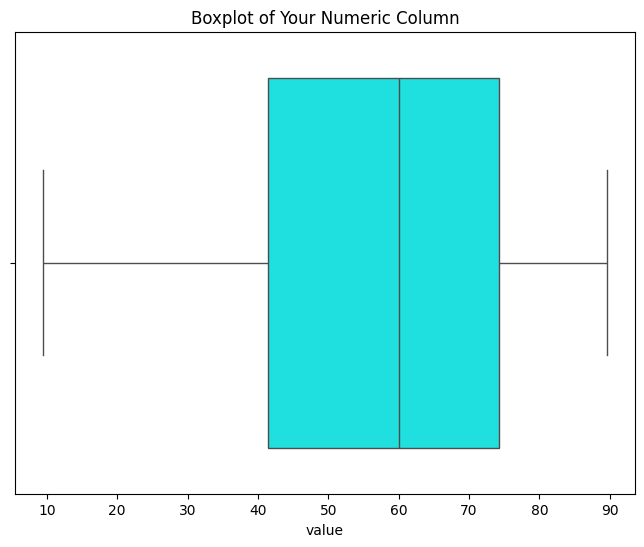

In [ ]:
import seaborn as sns
#Plotting a boxplot for a specific numerical column
plt.figure(figsize=(8,6))
sns.boxplot(x=df['C'], color='cyan')
plt.title("Boxplot of Your Numeric Column")
plt.xlabel('value')
plt.show()

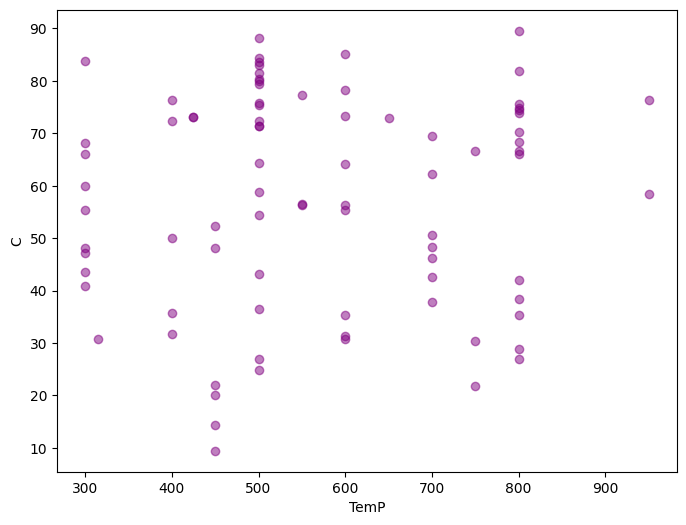

In [ ]:
#Plot a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['TemP'], df['C'], alpha=0.5, color = 'purple')
plt.xlabel("TemP")
plt.ylabel("C")
plt.show()

<ipython-input-32-5cdc07a7ac3a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Biomass', y="PS", data=df, palette="muted")


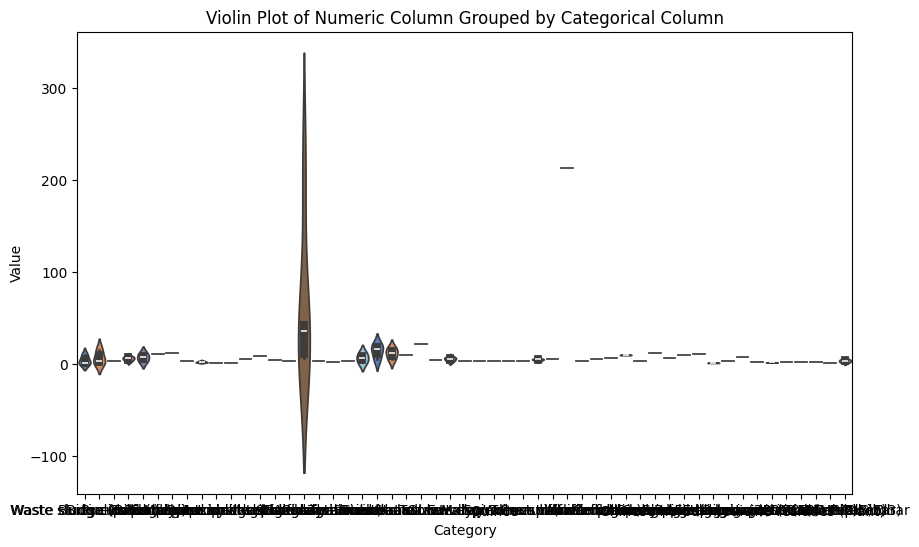

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Biomass', y="PS", data=df, palette="muted")
plt.title("Violin Plot of Numeric Column Grouped by Categorical Column")
plt.xlabel('Category')
plt.ylabel("Value")
plt.show()